<p style="text-align: center;">
  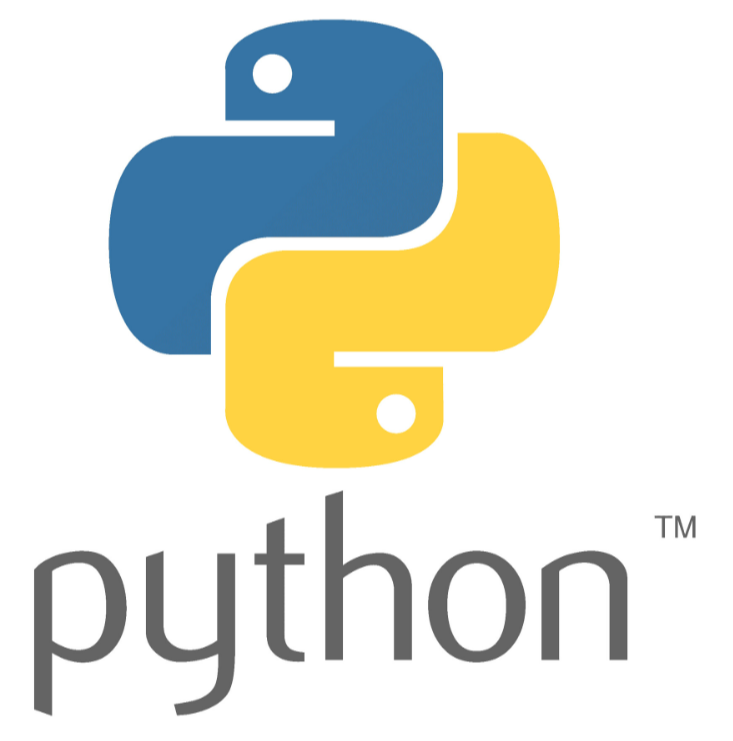
</p>

<h3 style="text-align: center;"><b>Семинар №7 ФБМФ МФТИ</b></h3>

https://cs.mipt.ru/gertsev/fbmf/category/intro_python.html

# События в pygame

In [ ]:
import pygame
pygame.init()                         
screen = pygame.display.set_mode((400, 300))  
pygame.display.set_caption("Самый простой пример")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:  
            running = False

    screen.fill((30, 144, 255))   
    
    pygame.display.flip()               

pygame.quit()     

## события мыши

| Кнопка мыши              | Значение `button` |
| ------------------------ | ----------------: |
| Левая                    |                 1 |
| Средняя                  |                 2 |
| Правая                   |                 3 |
| Колесо вперёд (скролл ↑) |                 4 |
| Колесо назад (скролл ↓)  |                 5 |

In [ ]:
import pygame
pygame.init()                         
screen = pygame.display.set_mode((400, 300))  
pygame.display.set_caption("Самый простой пример")

running = True
 
while running:  
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            if event.button == 1:
                pygame.draw.circle(screen, (255, 0, 0), event.pos, 50)
            elif event.button == 3:
                pygame.draw.circle(screen, (0, 0, 255), event.pos, 50)
    
    pygame.display.flip()               

pygame.quit()     

У событий MOUSEMOTION есть еще один атрибут – rel. Он показывает относительное смещение по обеим осям

rel удобно использовать, если нужно отрисовывать линии или следы, или определять скорость движения

In [ ]:
import pygame
pygame.init()                         
screen = pygame.display.set_mode((400, 300))  
pygame.display.set_caption("Пример следа")

running = True

# координаты для относительного старта следа мыши
x, y = 200, 150  

while running:  
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        
        elif event.type == pygame.MOUSEBUTTONDOWN:
            if event.button == 1:
                pygame.draw.circle(screen, (255, 0, 0), event.pos, 50)
            elif event.button == 3:
                pygame.draw.circle(screen, (0, 0, 255), event.pos, 50)

        elif event.type == pygame.MOUSEMOTION:
            # event.rel = (dx, dy) — относительное смещение
            dx, dy = event.rel
            x += dx
            y += dy
            pygame.draw.circle(screen, (0, 255, 0), (x, y), 5)

    pygame.display.flip()               

pygame.quit()

x, y = pygame.mouse.get_pos()

## события клавиш

In [2]:
import pygame
pygame.init()

screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Движение кружка по шагам")

x, y = 200, 150
radius = 20
step = 20  

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                y -= step
            elif event.key == pygame.K_DOWN:
                y += step
            elif event.key == pygame.K_LEFT:
                x -= step
            elif event.key == pygame.K_RIGHT:
                x += step

            x = max(radius, min(400 - radius, x))
            y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (0, 255, 0), (x, y), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
import pygame
pygame.init()

screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Плавное движение кружка")

x, y = 200, 150
radius = 20
speed = 0.01

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    keys = pygame.key.get_pressed()
    if keys[pygame.K_UP]:
        y -= speed
    if keys[pygame.K_DOWN]:
        y += speed
    if keys[pygame.K_LEFT]:
        x -= speed
    if keys[pygame.K_RIGHT]:
        x += speed

    x = max(radius, min(400 - radius, x))
    y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (0, 255, 0), (x, y), radius)
    pygame.display.flip()
pygame.quit()

## другие клавиши

In [7]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Движение кружка по шагам")

x, y = 200, 150
radius = 20
step = 20

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_w:     
                y -= step
            elif event.key == pygame.K_s:   
                y += step
            elif event.key == pygame.K_a:    
                x -= step
            elif event.key == pygame.K_d:   
                x += step

            x = max(radius, min(400 - radius, x))
            y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (0, 255, 0), (x, y), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

event.mod 

In [9]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Важный пример")

x, y = 200, 150
radius = 20
step = 20
color = (0, 255, 0)

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.KEYDOWN:
            mods = event.mod 

            if event.key == pygame.K_w:
                y -= step
            elif event.key == pygame.K_s:
                if mods & pygame.KMOD_ALT:
                    color = (random.randint(0, 255),
                             random.randint(0, 255),
                             random.randint(0, 255))
                else:
                    y += step
            elif event.key == pygame.K_a:
                x -= step
            elif event.key == pygame.K_d:
                if mods & pygame.KMOD_CTRL:
                    x += step * 3
                else:
                    x += step

            x = max(radius, min(400 - radius, x))
            y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, color, (x, y), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

# звук

https://zvukogram.com/category/

In [21]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Движение кружка со звуком клавиш")

key_sound = pygame.mixer.Sound("click.wav")

x, y = 200, 150
radius = 20
step = 20

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            key_sound.play()

            if event.key == pygame.K_w:
                y -= step
            elif event.key == pygame.K_s:
                y += step
            elif event.key == pygame.K_a:
                x -= step
            elif event.key == pygame.K_d:
                x += step

            x = max(radius, min(400 - radius, x))
            y = max(radius, min(300 - radius, y))

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (0, 255, 0), (x, y), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

# Интересный функционал

In [26]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Гравитация и смена дня/ночи")

x = 200
y = 150
radius = 20

gravity = 2
y_speed = 0
step = 20

background_color = (30, 144, 255)  
running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_w:
                y_speed = -20  

            elif event.key == pygame.K_SPACE:
                if background_color == (30, 144, 255):
                    background_color = (10, 10, 40)
                else:
                    background_color = (30, 144, 255)

    y_speed += gravity
    y += y_speed

    if y + radius >= 300:
        y = 300 - radius
        y_speed = 0  
    if y - radius <= 0:
        y = radius
        y_speed = 0

    screen.fill(background_color)
    pygame.draw.circle(screen, (0, 255, 0), (x, int(y)), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

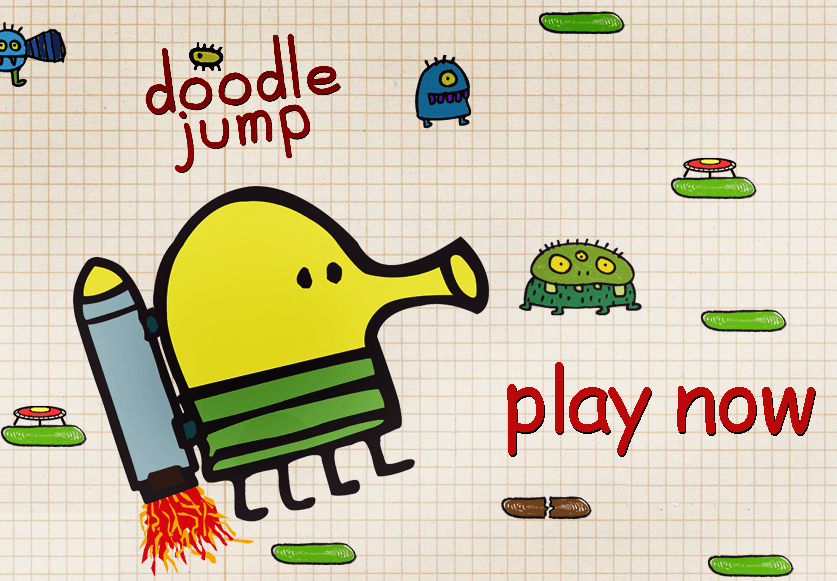

In [38]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Гравитация с  фоном")

x = 200
y = 150
radius = 20

gravity = 2
y_speed = 0
step = 20

# Загружаем картинки
background_day = pygame.image.load("day.jpg")
background_night = pygame.image.load("night.jpg")

# Масштабируем картинки под размер окна
background_day = pygame.transform.scale(background_day, (screen_width, screen_height))
background_night = pygame.transform.scale(background_night, (screen_width, screen_height))

background = background_day  # текущий фон

running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_w:
                y_speed = -20 
            elif event.key == pygame.K_SPACE:
                if background == background_day:
                    background = background_night
                else:
                    background = background_day

    y_speed += gravity
    y += y_speed

    if y + radius >= screen_height:
        y = screen_height - radius
        y_speed = 0
    if y - radius <= 0:
        y = radius
        y_speed = 0

    screen.blit(background, (0, 0))  # рисуем фон-картинку
    pygame.draw.circle(screen, (0, 255, 0), (x, int(y)), radius)
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

In [40]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Гравитация с фоном")

x = 200
y = 150
radius = 20

gravity = 2
y_speed = 0
step = 20

background_day = pygame.image.load("day.jpg")
background_night = pygame.image.load("night.jpg")
frog_image = pygame.image.load("frog.png")  # картинка лягушки

background_day = pygame.transform.scale(background_day, (screen_width, screen_height))
background_night = pygame.transform.scale(background_night, (screen_width, screen_height))
frog_image = pygame.transform.scale(frog_image, (40, 40))  # размер лягушки

background = background_day 

running = True

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_w:
                y_speed = -20 
            elif event.key == pygame.K_SPACE:
                background = background_night if background == background_day else background_day

    y_speed += gravity
    y += y_speed

    if y + frog_image.get_height() // 2 >= screen_height:
        y = screen_height - frog_image.get_height() // 2
        y_speed = 0
    if y - frog_image.get_height() // 2 <= 0:
        y = frog_image.get_height() // 2
        y_speed = 0

    screen.blit(background, (0, 0))  # рисуем фон
    screen.blit(frog_image, (x - frog_image.get_width() // 2, int(y) - frog_image.get_height() // 2))
    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

In [2]:
import pygame

pygame.init()
screen_width, screen_height = 400, 300
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Гравитация с фоном")

x = 200
y = 150
gravity = 2
y_speed = 0

background_day = pygame.image.load("day.jpg")
background_night = pygame.image.load("night.jpg")
frog_image = pygame.image.load("frog2.jpg").convert()  # используем convert для JPG

# Делаем белый цвет прозрачным
frog_image.set_colorkey((255, 255, 255))

background_day = pygame.transform.scale(background_day, (screen_width, screen_height))
background_night = pygame.transform.scale(background_night, (screen_width, screen_height))
frog_image = pygame.transform.scale(frog_image, (40, 40))  

background = background_day  

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_w:
                y_speed = -20
            elif event.key == pygame.K_SPACE:
                background = background_night if background == background_day else background_day

    y_speed += gravity
    y += y_speed

    if y + frog_image.get_height() // 2 >= screen_height:
        y = screen_height - frog_image.get_height() // 2
        y_speed = 0
    if y - frog_image.get_height() // 2 <= 0:
        y = frog_image.get_height() // 2
        y_speed = 0

    screen.blit(background, (0, 0))
    screen.blit(frog_image, (x - frog_image.get_width() // 2, int(y) - frog_image.get_height() // 2))

    pygame.display.flip()
    pygame.time.delay(20)

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Первая игра

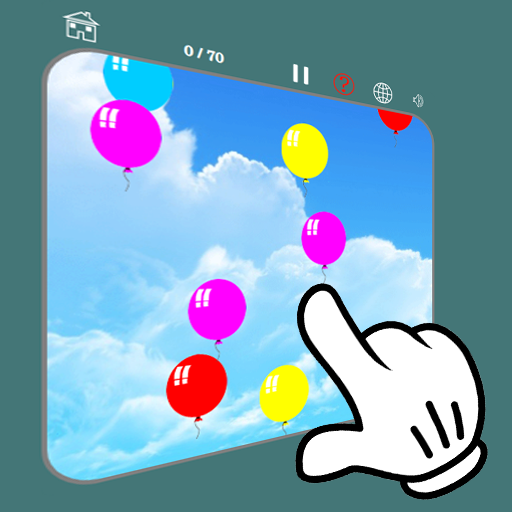

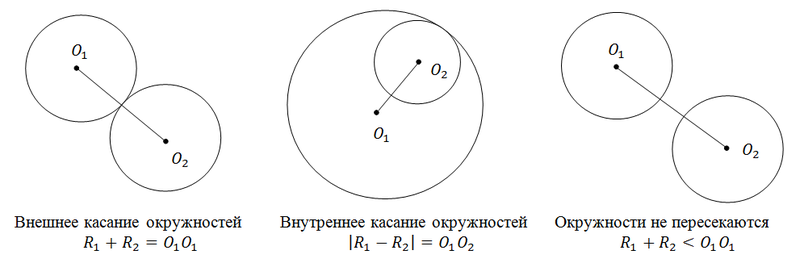

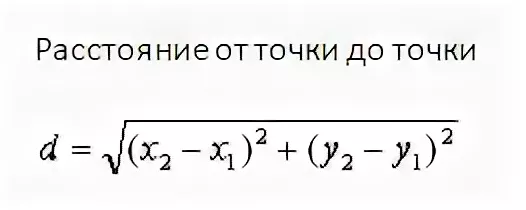

In [12]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра")
font = pygame.font.SysFont(None, 30)


player_radius = 15
target_radius = 20
score = 0


target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)



running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    player_x, player_y = pygame.mouse.get_pos()

    dx = player_x - target_x
    dy = player_y - target_y
    distance = (dx**2 + dy**2)**0.5
    if distance < player_radius + target_radius:
        score += 1
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius)  
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius) 

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

pygame.time.get_ticks() — функция в модуле pygame, которая возвращает количество миллисекунд, прошедших с момента инициализации Pygame

In [14]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра но на время :)))")
font = pygame.font.SysFont(None, 30)

player_radius = 15
target_radius = 20
score = 0

# Изначальные координаты цели и время её появления
target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)
target_spawn_time = pygame.time.get_ticks()  # время появления цели
target_visible_duration = 3000  # 3 секунды в миллисекундах

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    player_x, player_y = pygame.mouse.get_pos()

    dx = player_x - target_x
    dy = player_y - target_y
    distance = (dx**2 + dy**2)**0.5
    if distance < player_radius + target_radius:
        score += 1
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = pygame.time.get_ticks()  # обновляем время появления

    # Проверка пора ли скрыть цель 
    current_time = pygame.time.get_ticks()
    if current_time - target_spawn_time > target_visible_duration:
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius)  
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius) 

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

In [16]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра c проигрышем")
font = pygame.font.SysFont(None, 30)

player_radius = 15
target_radius = 20
score = 0
missed_streak = 0  # Счётчик пропущенных шариков

target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)
target_spawn_time = pygame.time.get_ticks() 
target_visible_duration = 3000  

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    player_x, player_y = pygame.mouse.get_pos()

    dx = player_x - target_x
    dy = player_y - target_y
    distance = (dx**2 + dy**2)**0.5
    caught = False
    if distance < player_radius + target_radius:
        score += 1
        caught = True
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = pygame.time.get_ticks()

    # Проверка, нужно ли скрыть цель после 3 секунд
    current_time = pygame.time.get_ticks()
    if current_time - target_spawn_time > target_visible_duration:
        # Если шарик не пойман, увеличиваем счётчик пропущенных
        if not caught:
            missed_streak += 1
        if missed_streak >= 2:
            print("Вы проиграли!")
            running = False
        # Появление нового шарика
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius)  
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius) 

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

Вы проиграли!


# Вторая игра

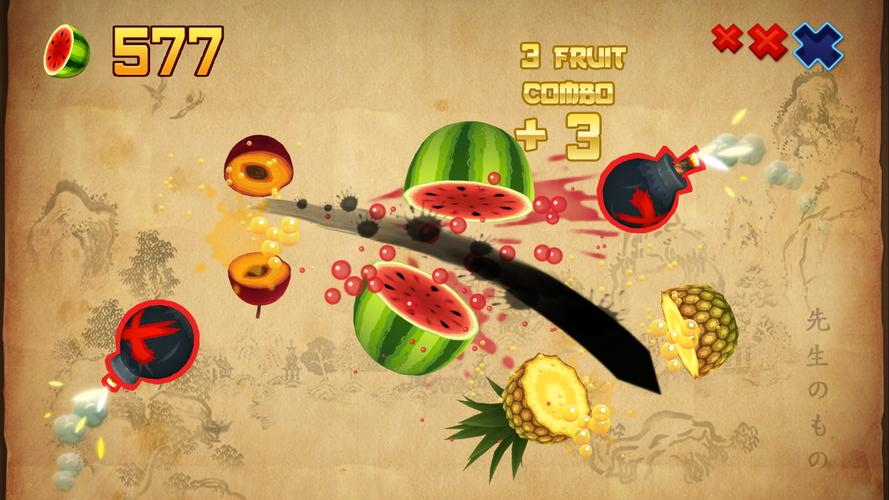

In [18]:
import pygame
import random

pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption("Простейшая игра")
font = pygame.font.SysFont(None, 30)

player_radius = 15
target_radius = 20
enemy_radius = 20

score = 0
missed_streak = 0

target_x = random.randint(target_radius, 400 - target_radius)
target_y = random.randint(target_radius, 300 - target_radius)
target_spawn_time = pygame.time.get_ticks()
target_visible_duration = 3000  # 3 секунды

enemy_x = random.randint(enemy_radius, 400 - enemy_radius)
enemy_y = random.randint(enemy_radius, 300 - enemy_radius)
enemy_spawn_time = pygame.time.get_ticks()
enemy_visible_duration = 2000  # 2 секунды

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    player_x, player_y = pygame.mouse.get_pos()
    current_time = pygame.time.get_ticks()

    # Проверка столкновения с красным шаром 
    dx = player_x - target_x
    dy = player_y - target_y
    if (dx**2 + dy**2)**0.5 < player_radius + target_radius:
        score += 1
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    # Проверка столкновения с чёрным шаром 
    dx_e = player_x - enemy_x
    dy_e = player_y - enemy_y
    if (dx_e**2 + dy_e**2)**0.5 < player_radius + enemy_radius:
        print("Вы проиграли! (прикоснулись к чёрному шару)")
        running = False

    # Проверка времени жизни красного шара
    if current_time - target_spawn_time > target_visible_duration:
        missed_streak += 1
        if missed_streak >= 2:
            print("Вы проиграли! (дважды пропустили)")
            running = False
        target_x = random.randint(target_radius, 400 - target_radius)
        target_y = random.randint(target_radius, 300 - target_radius)
        target_spawn_time = current_time

    # Проверка времени жизни чёрного шара 
    if current_time - enemy_spawn_time > enemy_visible_duration:
        enemy_x = random.randint(enemy_radius, 400 - enemy_radius)
        enemy_y = random.randint(enemy_radius, 300 - enemy_radius)
        enemy_spawn_time = current_time

    screen.fill((30, 144, 255))
    pygame.draw.circle(screen, (255, 0, 0), (target_x, target_y), target_radius) 
    pygame.draw.circle(screen, (0, 255, 0), (player_x, player_y), player_radius)  
    pygame.draw.circle(screen, (0, 0, 0), (enemy_x, enemy_y), enemy_radius)      

    text = font.render(f"Score: {score}", True, (255, 255, 255))
    screen.blit(text, (10, 10))

    pygame.display.flip()

pygame.quit()

Вы проиграли! (прикоснулись к чёрному шару)


# Задание

In [24]:
import pygame
import random

pygame.init()

screen = pygame.display.set_mode((400, 400))
pygame.display.set_caption("Падающие шары")


spawn_points = [(50, 50), (150, 50), (250, 50), (350, 50)]

running = True
clock = pygame.time.Clock()

balls = []  # список активных шаров (координаты)
spawn_interval = 2000  
last_spawn_time = 0

while running:
    current_time = pygame.time.get_ticks()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if current_time - last_spawn_time > spawn_interval:
        x, y = random.choice(spawn_points)
        balls.append([x, y])
        last_spawn_time = current_time

    for ball in balls:
        ball[1] += 0.01  # пикселей в миллисекунду

    # Убираем шары, которые упали ниже 
    balls = [ball for ball in balls if ball[1] < 400]

    screen.fill((255, 255, 255))
    for x, y in balls:
        pygame.draw.circle(screen, (255, 0, 0), (x, y), 20)

    pygame.display.flip()

pygame.quit()

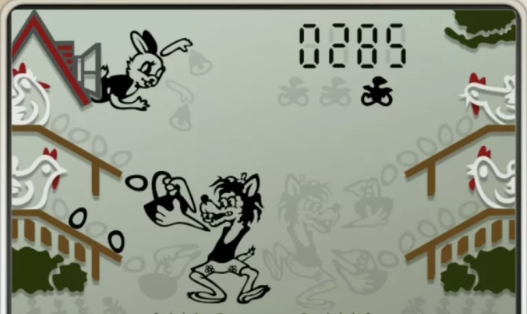

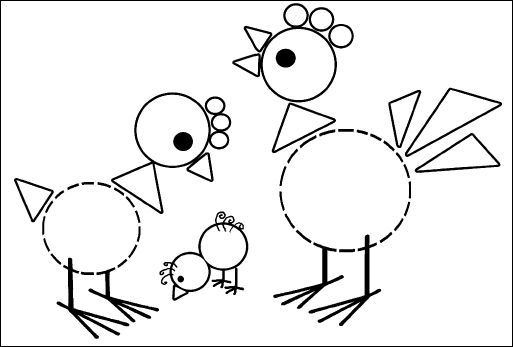